In [2]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-11-11 18:03:00--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   152MB/s    in 0.4s    

2023-11-11 18:03:01 (152 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [3]:
import zipfile
local_zip='./cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./cats_and_dogs')
zip_ref.close()

In [4]:
import os
base_dir="cats_and_dogs/cats_and_dogs_filtered"
train_dir=os.path.join(base_dir,'train')
valid_dir=os.path.join(base_dir,'validation')

train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
valid_cats_dir=os.path.join(valid_dir,'cats')
valid_dogs_dir=os.path.join(valid_dir,'dogs')


In [5]:
train_cats_fnames=os.listdir(train_cats_dir)
train_dogs_fnames=os.listdir(train_dogs_dir)
valid_cats_fnames=os.listdir(valid_cats_dir)
valid_dogs_fnames = os.listdir(valid_dogs_dir)

In [6]:
len(train_cats_fnames)

1000

In [7]:
len(train_dogs_fnames)

1000

In [8]:
len(valid_cats_fnames)

500

In [9]:
len(valid_dogs_fnames)

500

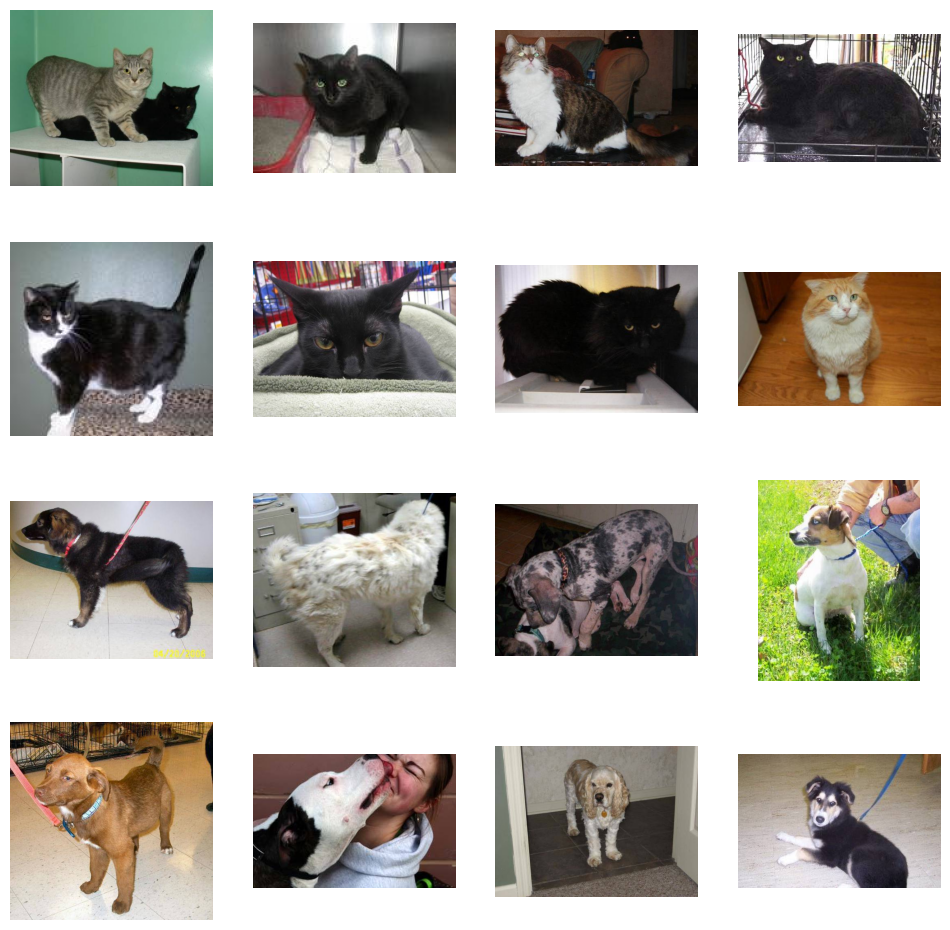

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
rows = 4
cols=4
pic_index=0

fig=plt.gcf()
fig.set_size_inches(12,12)
pic_index=pic_index+8
next_cat_pic=[os.path.join(train_cats_dir,fname)
              for fname in train_cats_fnames[pic_index - 8:pic_index]]
next_dog_pic=[os.path.join(train_dogs_dir,fname)
               for fname in train_dogs_fnames[pic_index - 8:pic_index]]

for i,img_path in enumerate(next_cat_pic+next_dog_pic):
  sp=plt.subplot(rows,cols,i+1)
  sp.axis('off')
  plt.imshow(mpimg.imread(img_path))

plt.show()


In [11]:
import tensorflow as tf


In [12]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),




    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [14]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),loss="binary_crossentropy",metrics=['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_data_gen=ImageDataGenerator(rescale=1.0/255.0)
valid_data_gen=ImageDataGenerator(rescale=1.0/255.0)

train_gen=train_data_gen.flow_from_directory(train_dir,
                                             batch_size=20,
                                             target_size=(150,150),
                                             class_mode='binary'
                                             )

valid_gen=valid_data_gen.flow_from_directory(valid_dir,
                                             batch_size=20,
                                             target_size=(150,150),
                                             class_mode='binary'
                                             )



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:

hist=model.fit(train_gen,epochs=10,validation_data=valid_gen)

Epoch 1/10
100/100 [==============================] - 7s 67ms/step - loss: 0.0642 - accuracy: 0.9760 - val_loss: 1.2189 - val_accuracy: 0.7170
Epoch 2/10
100/100 [==============================] - 5s 48ms/step - loss: 0.0427 - accuracy: 0.9850 - val_loss: 1.4674 - val_accuracy: 0.7350
Epoch 3/10
100/100 [==============================] - 5s 49ms/step - loss: 0.0669 - accuracy: 0.9800 - val_loss: 1.5518 - val_accuracy: 0.7200
Epoch 4/10
100/100 [==============================] - 7s 66ms/step - loss: 0.0358 - accuracy: 0.9900 - val_loss: 1.5828 - val_accuracy: 0.7300
Epoch 5/10
100/100 [==============================] - 5s 48ms/step - loss: 0.0316 - accuracy: 0.9890 - val_loss: 1.4942 - val_accuracy: 0.7340
Epoch 6/10
100/100 [==============================] - 6s 60ms/step - loss: 0.0186 - accuracy: 0.9935 - val_loss: 2.0062 - val_accuracy: 0.7390
Epoch 7/10
100/100 [==============================] - 5s 49ms/step - loss: 0.0241 - accuracy: 0.9915 - val_loss: 2.0576 - val_accuracy: 0.7270

<Figure size 640x480 with 0 Axes>

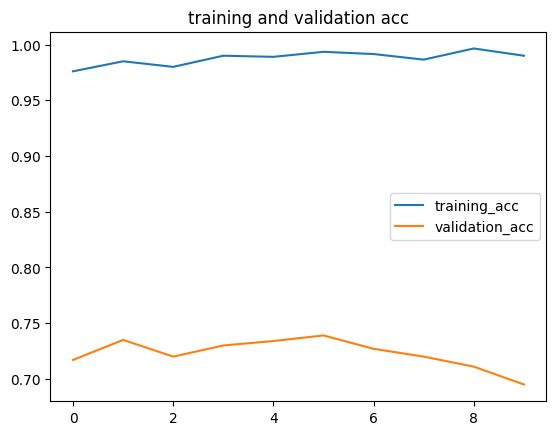

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt

acc=hist.history['accuracy']
loss=hist.history['loss']

v_acc=hist.history['val_accuracy']
v_loss=hist.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs,acc,label='training_acc')
plt.plot(epochs,v_acc,label='validation_acc')
plt.title("training and validation acc")
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

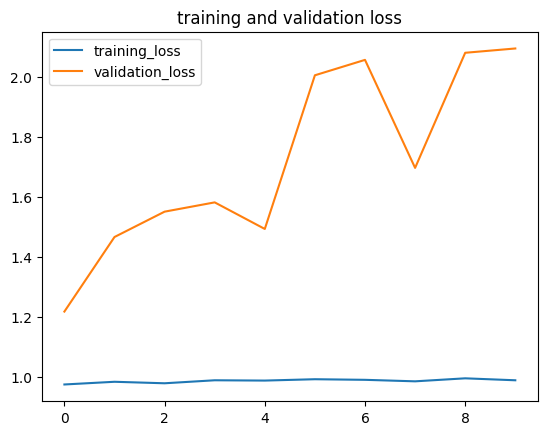

<Figure size 640x480 with 0 Axes>

In [20]:

plt.plot(epochs,acc,label='training_loss')
plt.plot(epochs,v_loss,label='validation_loss')
plt.title("training and validation loss")
plt.legend()
plt.figure()


In [21]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img,img_to_array

uploaded=files.upload()
for f in uploaded.keys():
  path='/content/'+f
  img=load_img(path,target_size=(150,150))
  img_arr=img_to_array(img)
  img_arr=img_arr/255.0
  img_arr=np.expand_dims(img_arr,axis=0)
  images=np.vstack([img_arr])
  classes=model.predict(images,batch_size=20)
  print(classes[0])

  if classes[0]>0.5:
    print("This picture is of a Dog")
  else:
    print("This picture is of Cat")

Saving cat1.jpg to cat1.jpg
1/1 [==============================] - 0s 237ms/step
[0.00107341]
This picture is of Cat
